In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('DistribuicaoAnestesicosBloqueadores.csv', sep=';', encoding='iso-8859-1')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
estados = df['ESTADO'].value_counts()
df

,REGIÃO,ESTADO,DESTINATÁRIO,ORIGEM,FORNECEDOR,MEDICAMENTO,APRESENTAÇÃO,QUANTIDADE,PEDIDO SISMAT,Pauta,STATUS,DATA DE ENTREGA
0,SUDESTE,SÃO PAULO,SES,REQUISIÇÃO ADMINISTRATIVA,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"DEXTROCETAMINA, CLORIDRATO 50 MG/ML",AMPOLA 10 mL,350.00,320424,1,Entrega realizada,29/06/2020
1,CENTRO-OESTE,MATO GROSSO,SES,REQUISIÇÃO ADMINISTRATIVA,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"DEXTROCETAMINA, CLORIDRATO 50 MG/ML",AMPOLA 10 mL,800.00,320423,1,Entrega realizada,29/06/2020
2,NORTE,AMAPÁ,SES,REQUISIÇÃO ADMINISTRATIVA,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"DEXTROCETAMINA, CLORIDRATO 50 MG/ML",AMPOLA 10 mL,2.20,320410,1,Entrega realizada,29/06/2020
3,NORDESTE,CEARÁ,SES,REQUISIÇÃO ADMINISTRATIVA,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"DEXTROCETAMINA, CLORIDRATO 50 MG/ML",AMPOLA 10 mL,16.00,320412,1,Entrega realizada,29/06/2020
4,NORDESTE,RIO GRANDE DO NORTE,SES,REQUISIÇÃO ADMINISTRATIVA,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"DEXTROCETAMINA, CLORIDRATO 50 MG/ML",AMPOLA 10 mL,450.00,320420,1,Entrega realizada,29/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-,MINISTÉRIO DA DEFESA,SES,REQUISIÇÃO ADMINISTRATIVA,BLAU FARMACÊUTICA S/A,"SUXAMETÔNIO, CLORETO 100 MG PÓ LIOF. INJETÁVEL",-,3.75,347014,35,Entrega realizada,06/04/2021
1074,-,MINISTÉRIO DA DEFESA,SES,ORGANIZAÇÃO PAN-AMERICANA DA SAÚDE,LABORATOIRE AGUETTANT,SULFATO DE MORFINA 10 MG/ML,AMPOLA 1ML,7.50,347014,35,Entrega realizada,06/04/2021
1075,-,MINISTÉRIO DA DEFESA,SES,ORGANIZAÇÃO PAN-AMERICANA DA SAÚDE,LABORATOIRE RENAUDIN,"NOREPINEFRINA, HEMITARTARATO 2 MG/ML",AMPOLA 4 mL,45.00,347014,35,Entrega realizada,06/04/2021
1076,-,MINISTÉRIO DA DEFESA,SES,CONTRATO Nº 305/2020 - ARP 101/2020,CRISTÁLIA PRODUTOS QUÍMICOS E FARMACÊUTICOS LTDA,"FENTANILA, CITRATO 0,05 MG/ML",AMPOLA 10 ML,12.50,347014,35,Entrega realizada,06/04/2021



Quantidade de fornecimentos por fornecedor em todo País



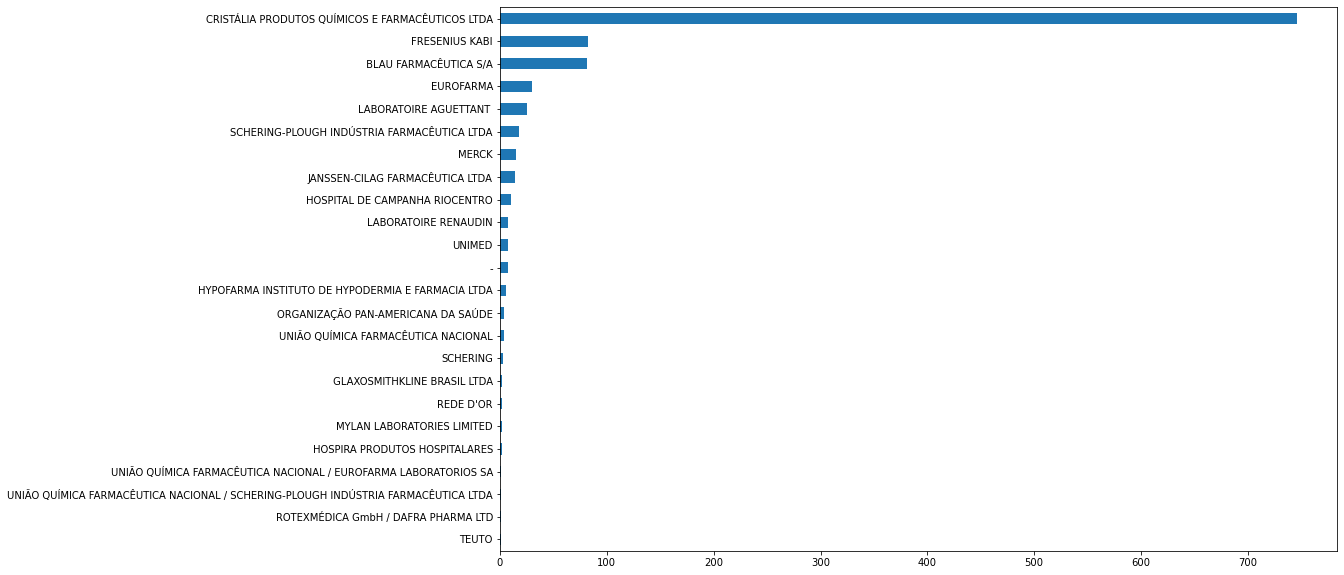

In [233]:
df_count = df['FORNECEDOR'].value_counts().sort_values(ascending=True)
print('\nQuantidade de fornecimentos por fornecedor em todo País\n')
plot = df_count.plot.barh(figsize=(15,10))


Quantidade total de itens fornecidos para cada Estado


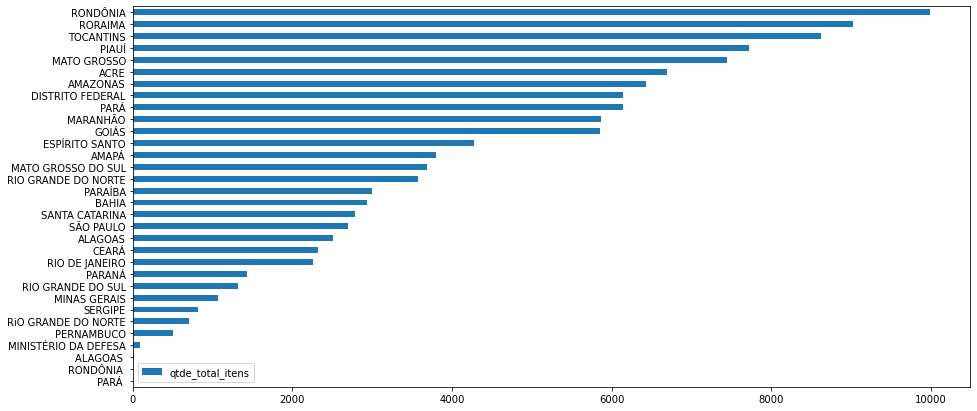

In [222]:
df3 = pd.DataFrame(columns=('qtde_fornecedores', 'qtde_total_itens'))

for estado in estados.iteritems():
    estado = estado[0]
    df2 = df.loc[(df['ESTADO'] == f'{estado}')]
    qtde_fornecedores = df2['FORNECEDOR'].value_counts()

    total = 0
    for row in df2.iterrows():
        qtde = row[1]['QUANTIDADE'],'\n'
        total = qtde[0] + total        
    df3.loc[estado] = [qtde_fornecedores.count(), total]

df3 = df3.sort_values(by=['qtde_total_itens'])
df4 = df3.drop(columns=['qtde_fornecedores'])
print('\nQuantidade total de itens fornecidos para cada Estado')
plot = df4.plot.barh(figsize=(15,7))


Quantidade de fornecedores por Estado



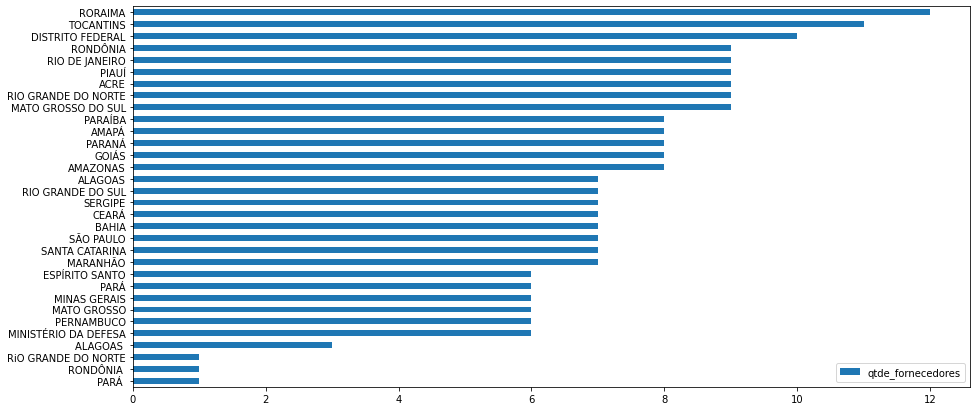

In [223]:
df3 = df3.sort_values(by=['qtde_fornecedores'])
df5 = df3.drop(columns=['qtde_total_itens'])
print('\nQuantidade de fornecedores por Estado\n')
plot = df5.plot.barh(figsize=(15,7))

Quantidade de contratos de fornecimento por fornecedor em cada Estado

RIO DE JANEIRO


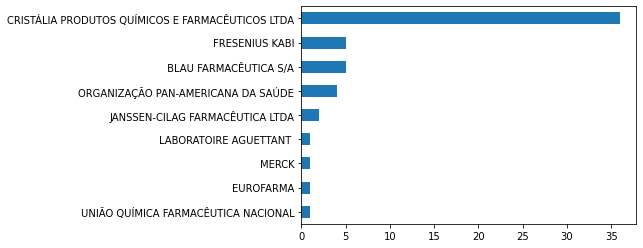




RORAIMA


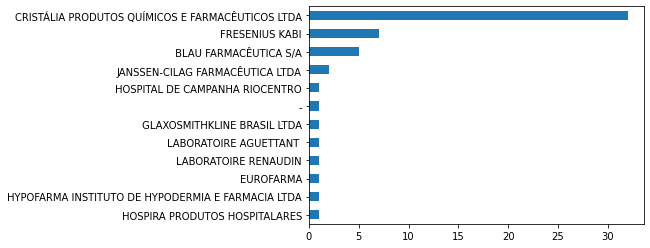




RIO GRANDE DO NORTE


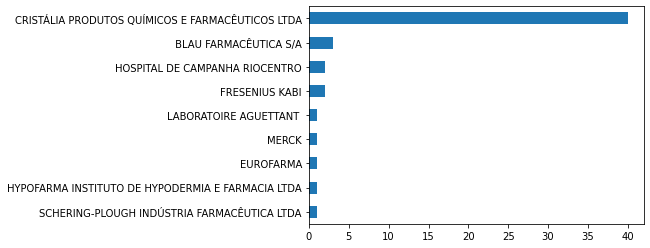




RONDÔNIA


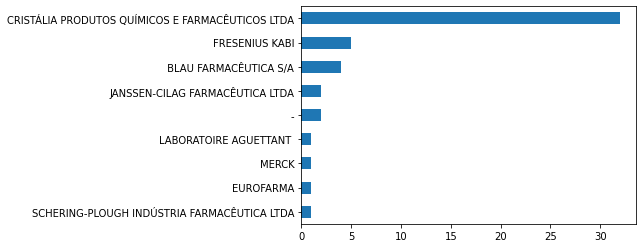




AMAPÁ


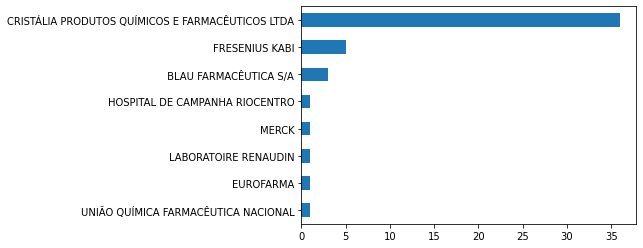




PIAUÍ


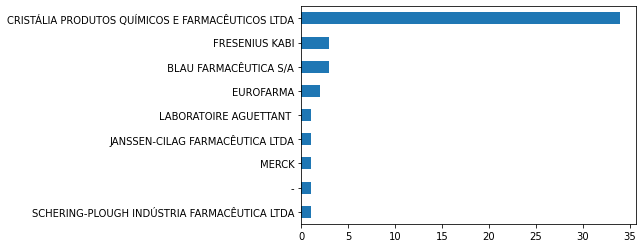




GOIÁS


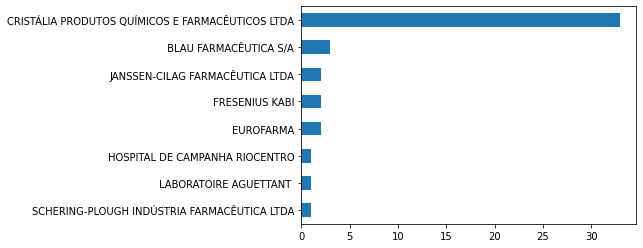




AMAZONAS


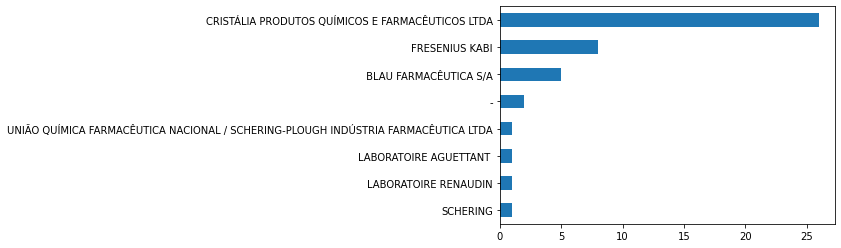




MATO GROSSO DO SUL


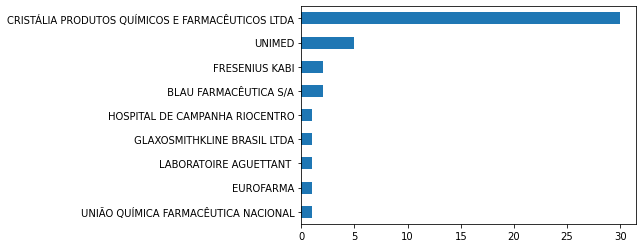




MATO GROSSO


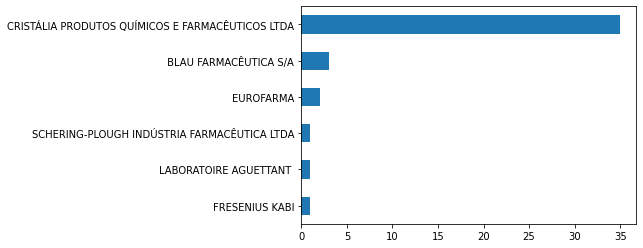




TOCANTINS


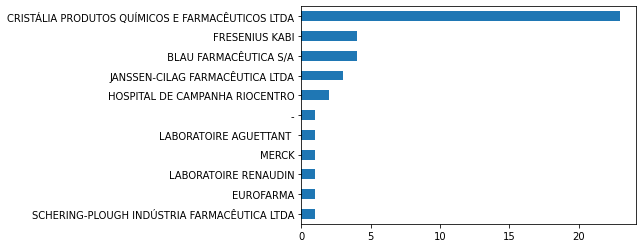




MARANHÃO


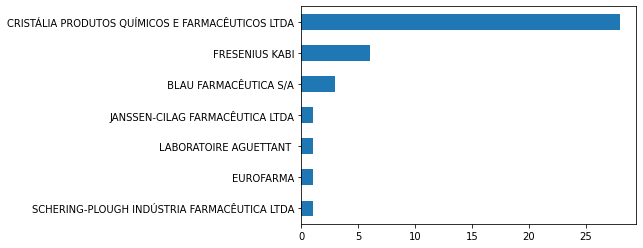




SÃO PAULO


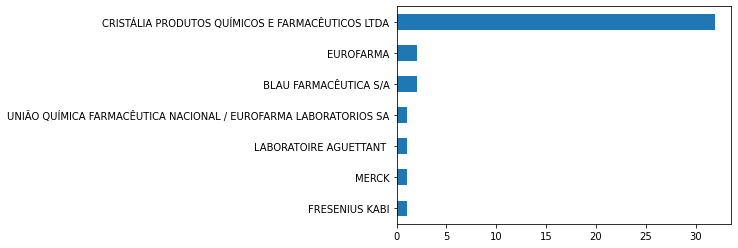




SERGIPE


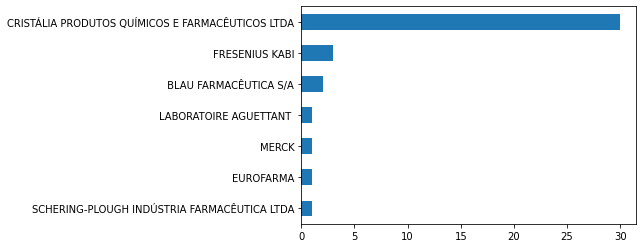




BAHIA


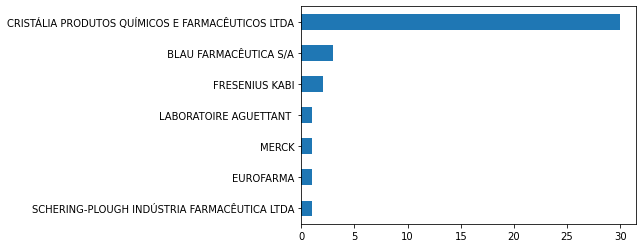




ACRE


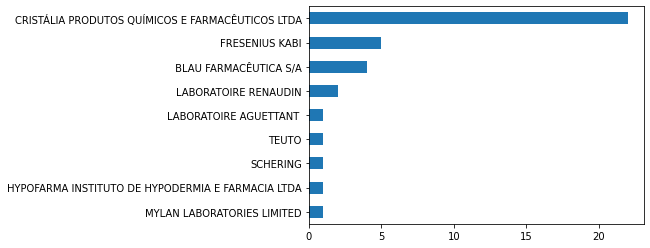




CEARÁ


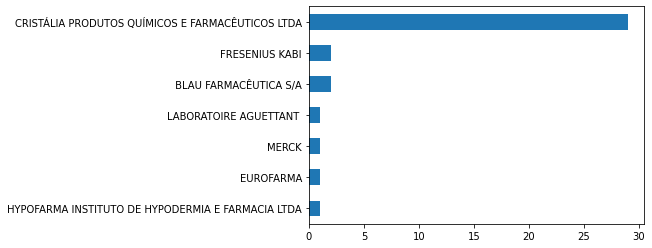




ALAGOAS


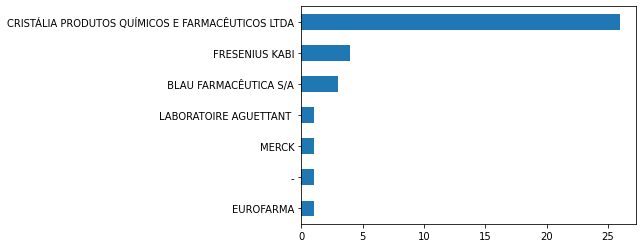




SANTA CATARINA


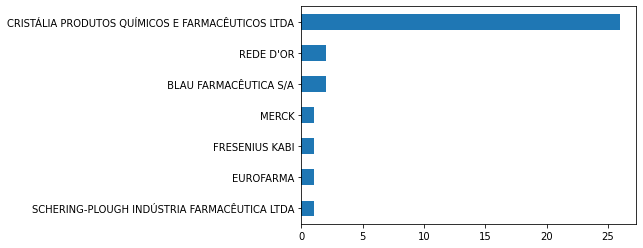




PARÁ


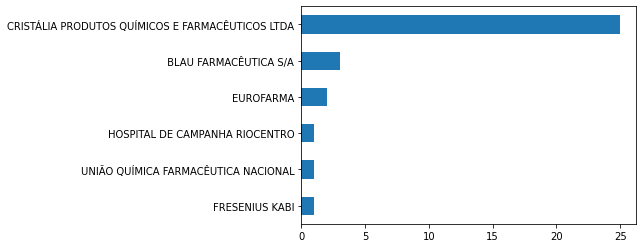




PARANÁ


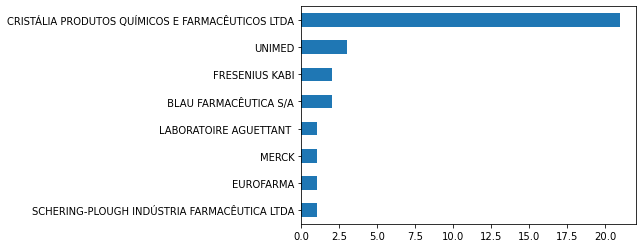




DISTRITO FEDERAL


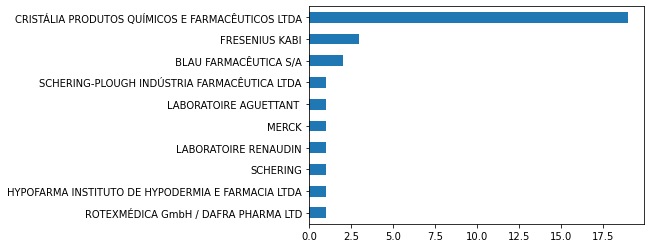




RIO GRANDE DO SUL


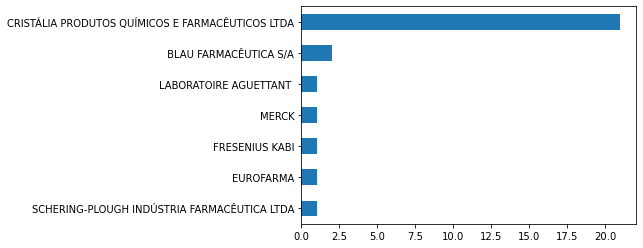




PARAÍBA


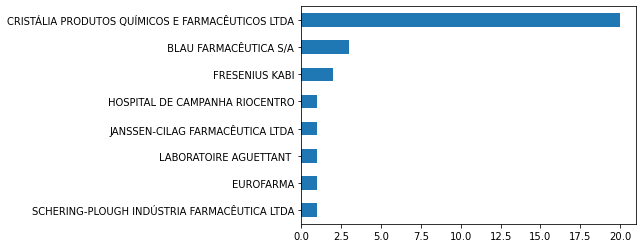




PERNAMBUCO


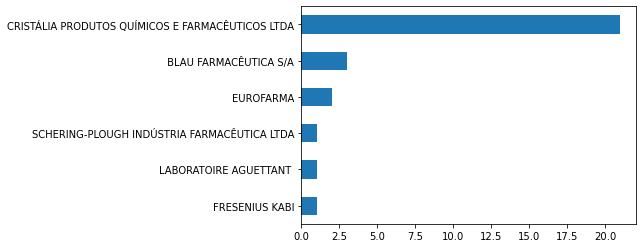




MINAS GERAIS


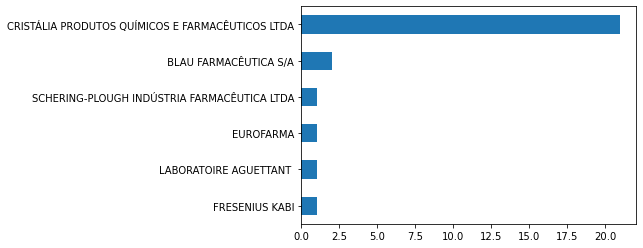




ESPÍRITO SANTO


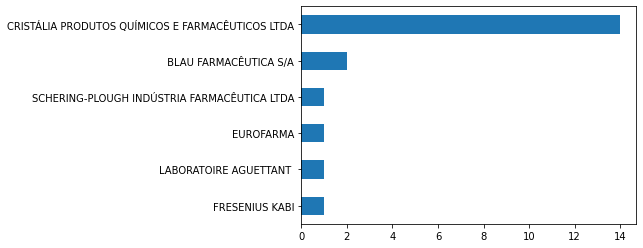




MINISTÉRIO DA DEFESA


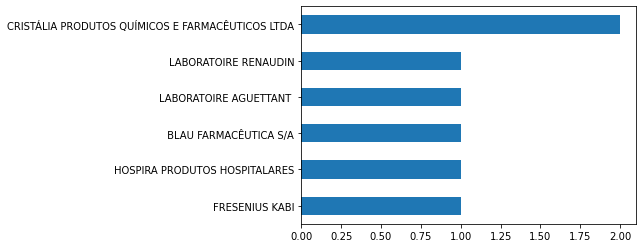




ALAGOAS 


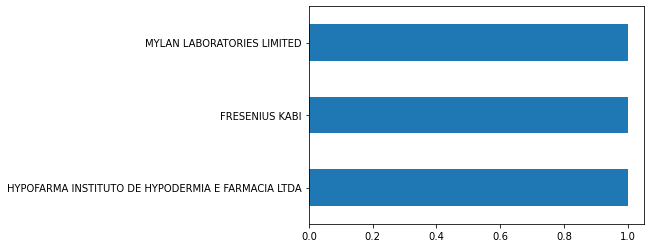




PARÁ 


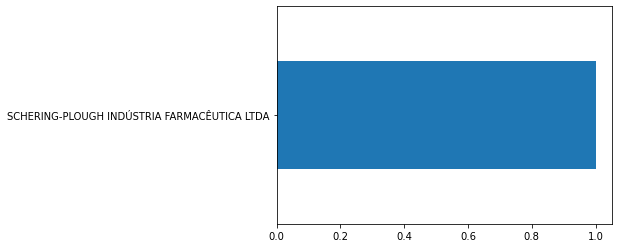




RONDÔNIA 


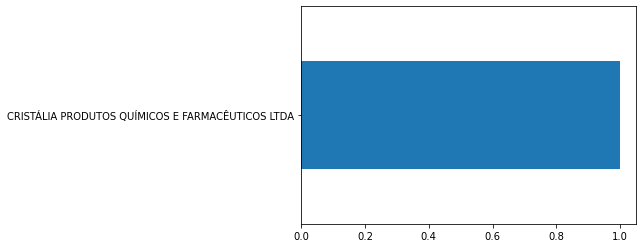




RiO GRANDE DO NORTE


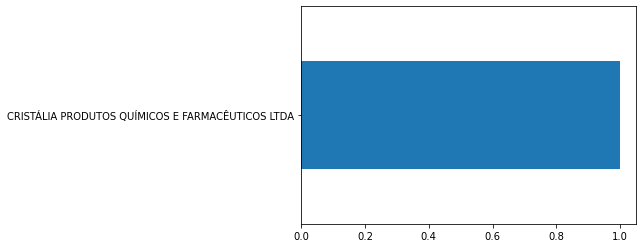

In [224]:
print('Quantidade de contratos de fornecimento por fornecedor em cada Estado\n')
for estado in estados.iteritems():
    estado = estado[0]
    print(estado)
    df2 = df.loc[(df['ESTADO'] == f'{estado}')]
    fornecedores = df2['FORNECEDOR'].value_counts().sort_values(ascending=True)
    fornecedores.plot.barh()
    plt.show()  
    print('\n\n')